In [10]:
import pandas as pd
import talib as ta
import os
import matplotlib.pyplot as plt
os.chdir('../scripts/')
from data_loader import read_csv_file


In [ ]:
file_path = '../data/TSLA_historical_data.csv'


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [26]:
def calculate_financial_metrics(df):
    df['Returns'] = df['Close'].pct_change()
    df['Cumulative Returns'] = (1 + df['Returns']).cumprod()
    df['Rolling Mean'] = df['Close'].rolling(window=20).mean()
    df['Rolling Std'] = df['Close'].rolling(window=20).std()
    return df

In [27]:
def calculate_indicators(df):
     """ Calculate technical indicators using TA-Lib. """
     df['SMA'] = ta.SMA(df['Close'], timeperiod=30)
     df['EMA'] = ta.EMA(df['Close'], timeperiod=30)
     df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
     df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
     return df


In [28]:
def visualize_data(df): 
    """ Create visualizations to better understand the data and the impact of different indicators on the stock price. """ 
    # Plot Closing Price and Moving Averages 
    plt.figure(figsize=(14,7))
    plt.plot(df['Close'], label='Close Price') 
    plt.plot(df['SMA'], label='SMA')
    plt.plot(df['EMA'], label='EMA') 
    plt.title('Stock Price and Moving Averages')
    plt.legend() 
    plt.show() 
    # Plot RSI
    plt.figure(figsize=(14,7)) 
    plt.plot(df['RSI'], label='RSI')
    plt.title('Relative Strength Index')
    plt.legend()
    plt.show()
     # Plot MACD
    plt.figure(figsize=(14,7))
    plt.plot(df['MACD'], label='MACD') 
    plt.plot(df['MACD_Signal'], label='MACD Signal') 
    plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram')
    plt.title('MACD')
    plt.legend()
    plt.show()

# Plot Closing Price and Rolling Mean
    plt.figure(figsize=(14,7)) 
    plt.plot(df['Close'], label='Close Price') 
    plt.plot(df['Rolling Mean'], label='Rolling Mean (20 days)') 
    plt.title('Stock Price and Rolling Mean') 
    plt.legend() 
    plt.show()

    # Plot Cumulative Returns
    plt.figure(figsize=(14,7))
    plt.plot(df['Cumulative Returns'], label = "Cumulative Returns")
    plt.title("Cumulative Returns")
    plt.legend()
    plt.show()

    # Plot Rolling Standard Deviation
    plt.figure(figsize=(14,7))
    plt.plot(df['Rolling Std'], label='Rolling Std')
    plt.title('Rolling Standard Deviation')
    plt.legend()
    plt.show()

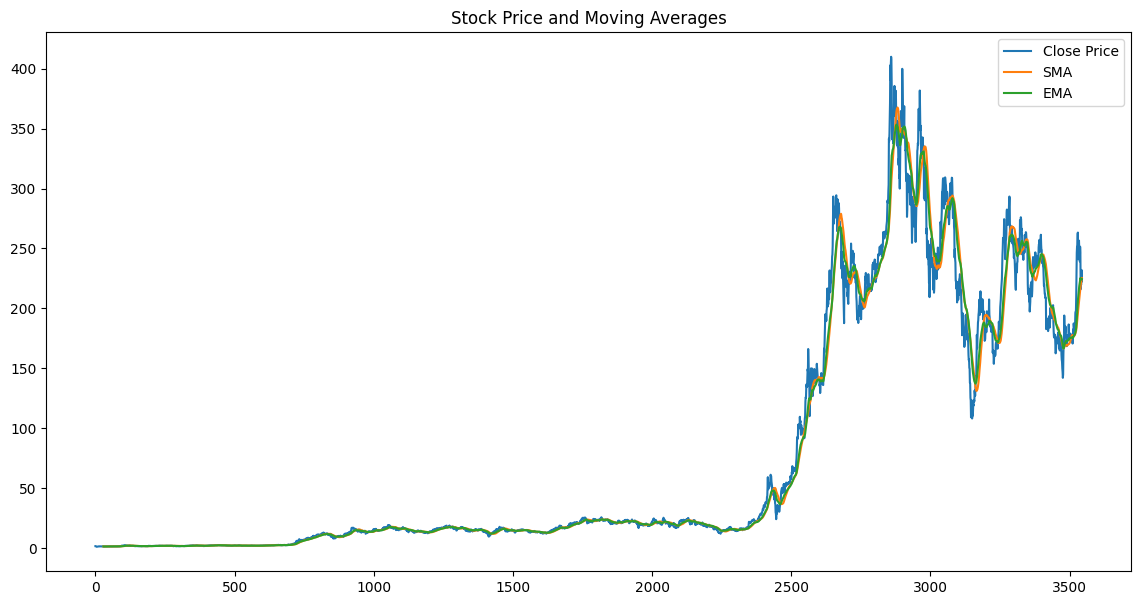

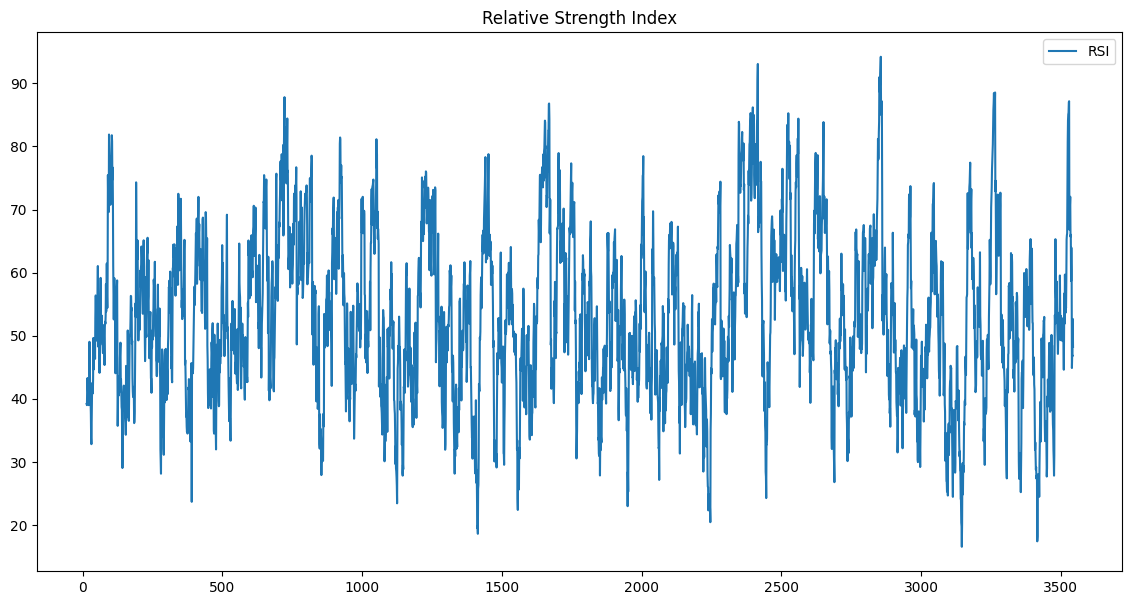

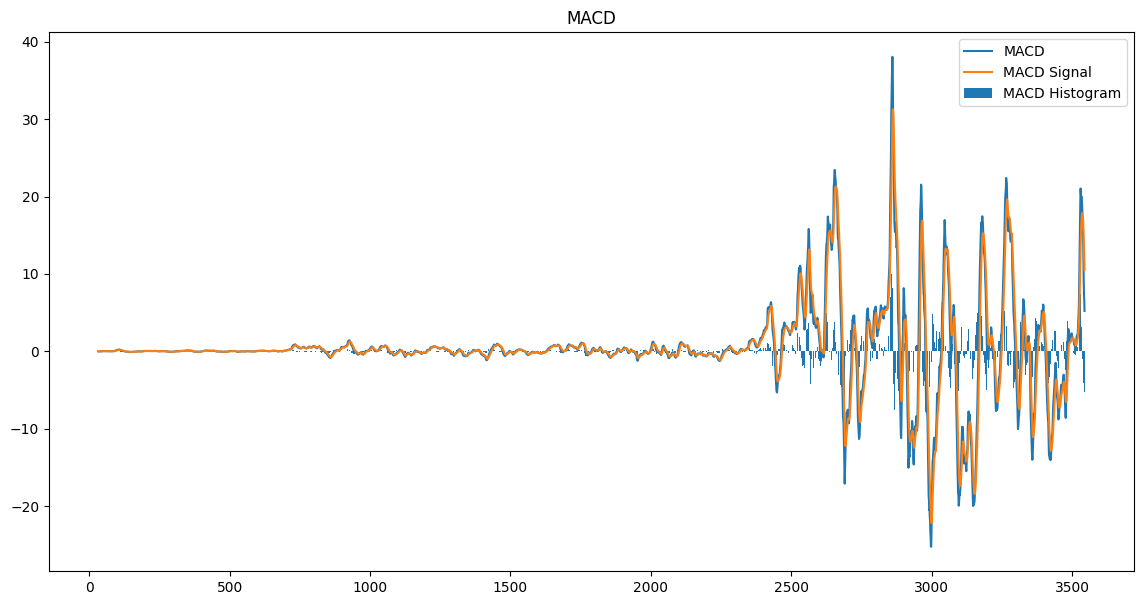

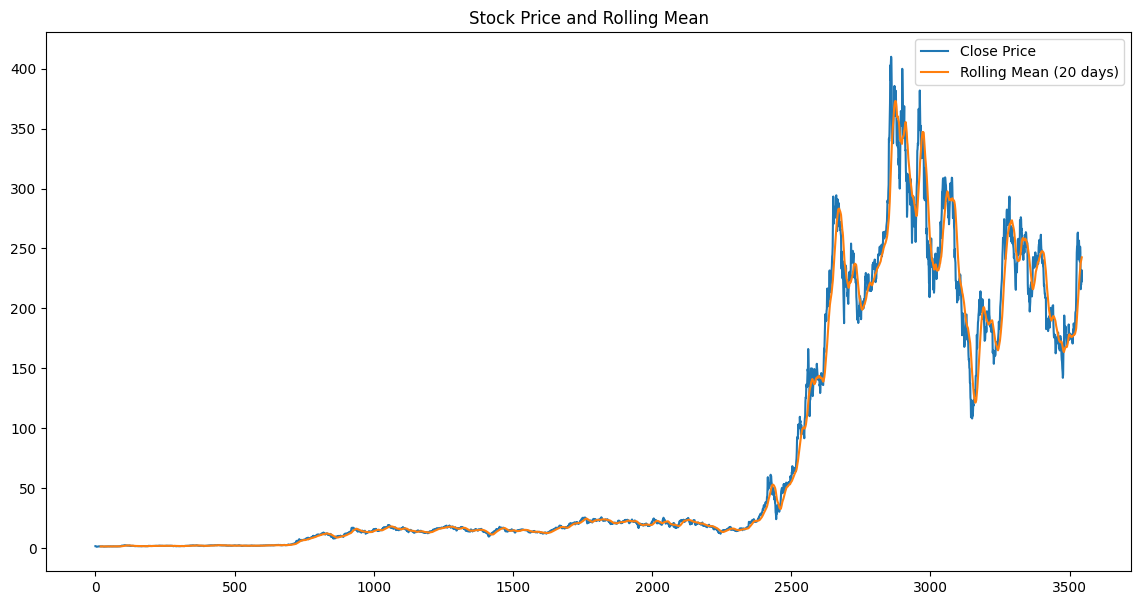

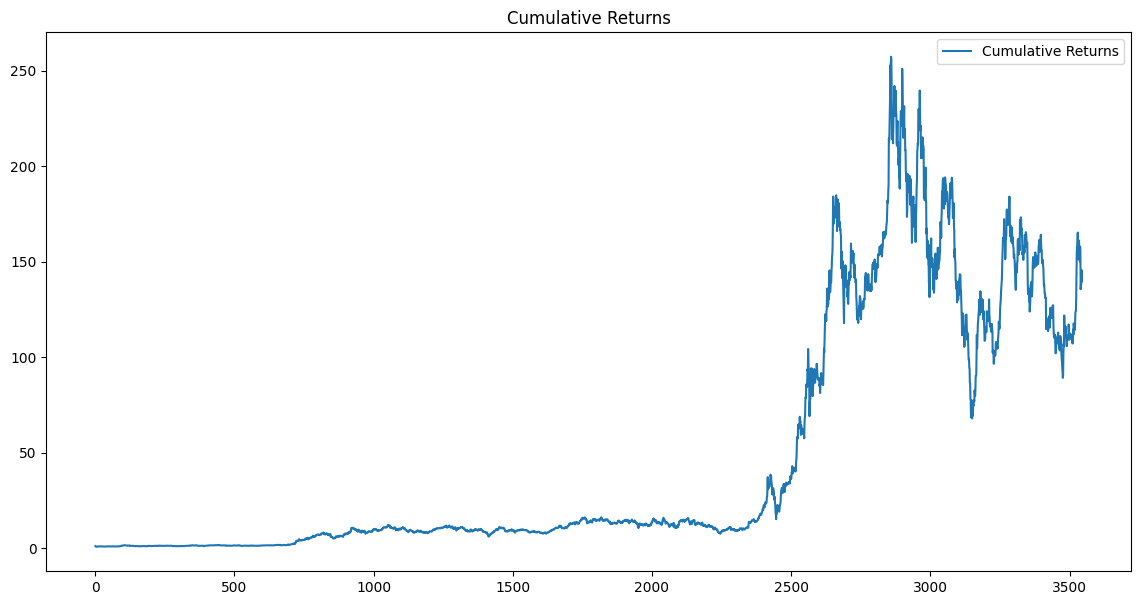

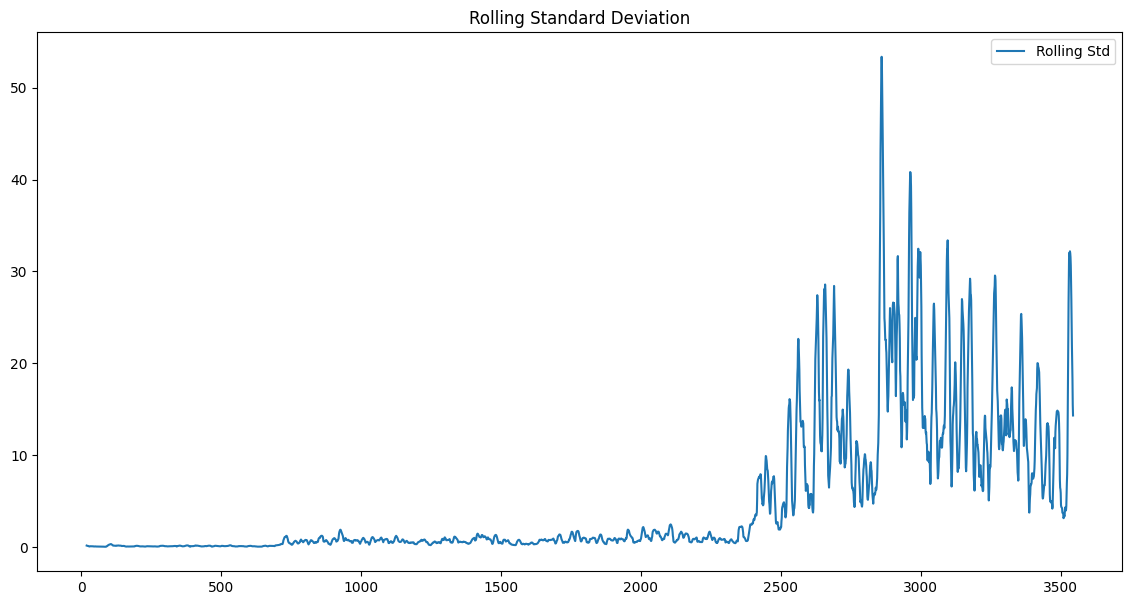

In [29]:
df = read_csv_file(file_path)
df = calculate_indicators(df)
df = calculate_financial_metrics(df)
visualize_data(df)

